# Jonathan Halverson
# Monday, March 27, 2017
# Part 12: Career statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
fights.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [3]:
df = pd.read_csv('data/fightmetric_career_stats.csv', header=0)
df.head(10)

,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg
0,Wesley Little,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,Bryan Travers,2.33,0.48,3.93,0.55,2.00,0.28,0.63,0.0
2,Sean McCorkle,0.85,0.44,2.48,0.52,2.12,0.40,0.33,4.2
3,Glaico Franca,2.35,0.42,3.46,0.47,2.68,0.42,0.76,0.3
4,Greg McIntyre,0.79,0.30,1.36,0.41,5.09,0.50,0.00,0.0
5,Dylan Andrews,2.21,0.50,2.72,0.46,2.83,0.50,0.57,0.4
6,Luke Rockhold,4.17,0.48,2.12,0.60,0.56,0.40,0.69,1.4
7,John Salter,1.68,0.32,1.68,0.68,2.85,0.46,0.66,0.5
8,Art Santore,1.40,0.12,7.31,0.52,0.00,0.00,1.00,0.0
9,Joe Brammer,2.15,0.31,2.80,0.56,0.81,0.50,0.50,0.0


     SLpM - Significant Strikes Landed per Minute
     Str. Acc. - Significant Striking Accuracy
     SApM - Significant Strikes Absorbed per Minute
     Str. Def. - Significant Strike Defence (the % of opponents strikes that did not land)
     TD Avg. - Average Takedowns Landed per 15 minutes
     TD Acc. - Takedown Accuracy
     TD Def. - Takedown Defense (the % of opponents TD attempts that did not land)
     Sub. Avg. - Average Submissions Attempted per 15 minutes

In [4]:
fs = fights[fights.Date > pd.to_datetime('2005-01-01')]
win_lose = fs.Winner.append(fs.Loser)
num_fights = win_lose.value_counts().to_frame()
num_fights.columns = ['total_fights']
num_fights.size

1383

In [5]:
# Dorian Price is the only UFC fighter after 2005 with a total of 0 because he lost in 23 seconds
df['total'] = df.sum(axis=1)

In [6]:
cs = num_fights.merge(df, left_index=True, right_on='Name', how='left').reset_index(drop=True)
cs.head()

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
0,27,Michael Bisping,4.44,0.38,2.63,0.66,1.10,0.43,0.64,0.3,10.58
1,26,Gleison Tibau,1.95,0.33,2.37,0.63,4.30,0.54,0.92,0.9,11.94
2,26,Jim Miller,2.75,0.39,2.64,0.62,1.70,0.42,0.48,2.1,11.10
3,25,Josh Koscheck,1.79,0.36,2.21,0.63,2.51,0.48,0.64,0.4,9.02
4,25,Diego Sanchez,2.75,0.36,2.95,0.58,1.48,0.21,0.50,1.0,9.83


In [7]:
cs.shape

(1383, 11)

In [8]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 11 columns):
total_fights    1383 non-null int64
Name            1383 non-null object
slpm            1383 non-null float64
str_acc         1383 non-null float64
sapm            1383 non-null float64
str_def         1383 non-null float64
td_avg          1383 non-null float64
td_acc          1383 non-null float64
td_def          1383 non-null float64
sub_avg         1383 non-null float64
total           1383 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 118.9+ KB


### We have career statistics for all fighters who have fought since January 1, 2005

### Top fighters with high work rate

In [9]:
cs5 = cs[cs.total_fights > 5]

In [10]:
st = cs5.sort_values('slpm', ascending=False).head(15)
st = st[['Name', 'slpm', 'total_fights']]
st.columns = ['Name', 'Strikes Landed per Minute', 'Total Fights']
st.index = range(1, 16)
st.to_latex('report/offense_defense/most_slpm_RAW.tex')

In [11]:
st = cs5.sort_values('str_acc', ascending=False).head(15)
st = st[['Name', 'str_acc', 'total_fights']]
st.str_acc = st.str_acc * 100
st.str_acc = st.str_acc.astype(int)
st.columns = ['Name', 'Striking Accuracy (%)', 'Total Fights']
st.index = range(1, 16)
st.to_latex('report/offense_defense/most_acc_str_RAW.tex')

In [12]:
st = cs5.sort_values('td_avg', ascending=False).head(15)
st = st[['Name', 'td_avg', 'total_fights']]
st.columns = ['Name', 'Takedowns per 15 Minutes', 'Total Fights']
st.index = range(1, 16)
st.to_latex('report/offense_defense/most_td_RAW.tex')

In [13]:
st = cs5.sort_values('sub_avg', ascending=False).head(15)
st = st[['Name', 'sub_avg', 'total_fights']]
st.columns = ['Name', 'Submission Attempts per 15 Minutes', 'Total Fights']
st.index = range(1, 16)
st.to_latex('report/offense_defense/most_subs_RAW.tex')

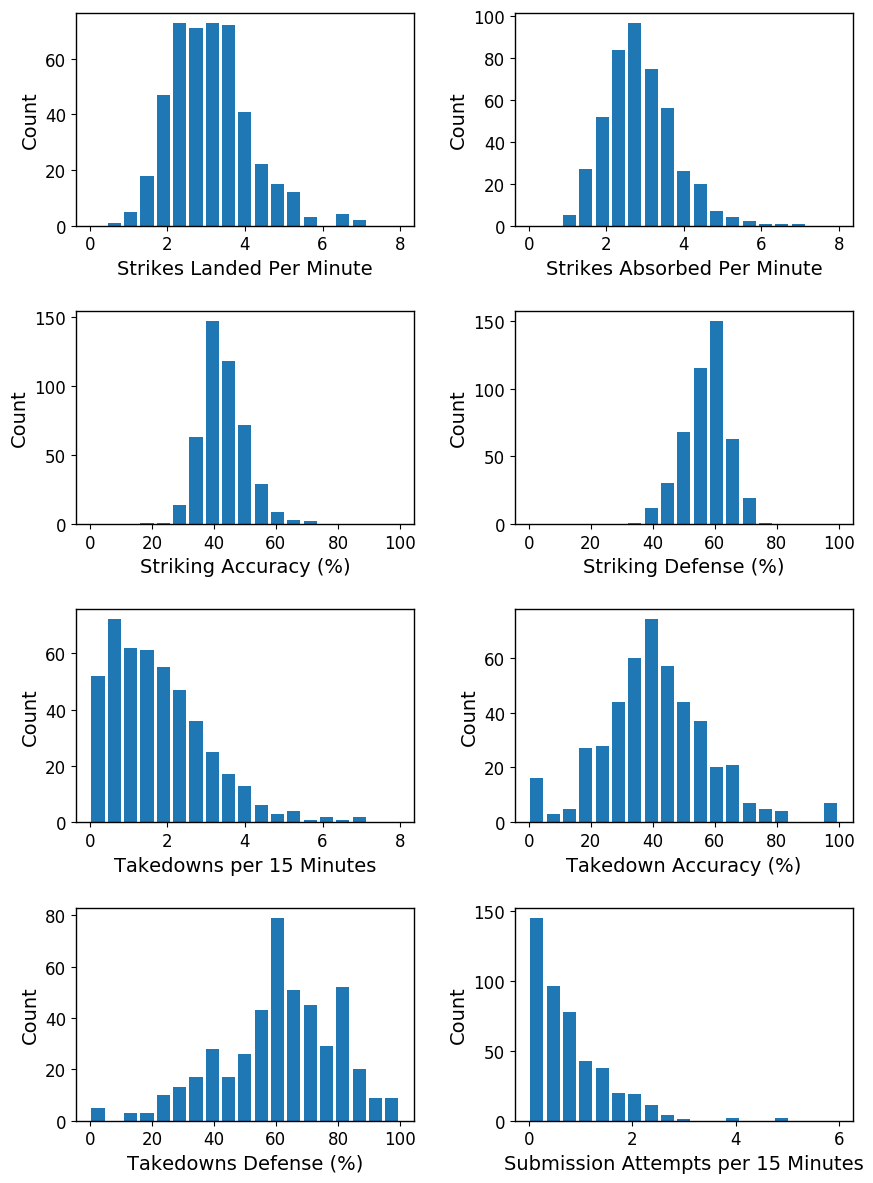

In [14]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(9, 12))

ax1.hist(cs5.slpm, bins=np.linspace(0, 8, num=20), rwidth=0.8)
ax1.set_xlabel('Strikes Landed Per Minute')
ax1.set_ylabel('Count')

ax2.hist(cs5.sapm, bins=np.linspace(0, 8, num=20), rwidth=0.8)
ax2.set_xlabel('Strikes Absorbed Per Minute')
ax2.set_ylabel('Count')

ax3.hist(100*cs5.str_acc, bins=np.linspace(0, 100, num=20), rwidth=0.8)
ax3.set_xlabel('Striking Accuracy (%)')
ax3.set_ylabel('Count')

ax4.hist(100*cs5.str_def, bins=np.linspace(0, 100, num=20), rwidth=0.8)
ax4.set_xlabel('Striking Defense (%)')
ax4.set_ylabel('Count')

ax5.hist(cs5.td_avg, bins=np.linspace(0, 8, num=20), rwidth=0.8)
ax5.set_xlabel('Takedowns per 15 Minutes')
ax5.set_ylabel('Count')

ax6.hist(100*cs5.td_acc, bins=np.linspace(0, 100, num=20), rwidth=0.8)
ax6.set_xlabel('Takedown Accuracy (%)')
ax6.set_ylabel('Count')

ax7.hist(100*cs5.td_def, bins=np.linspace(0, 100, num=20), rwidth=0.8)
ax7.set_xlabel('Takedowns Defense (%)')
ax7.set_ylabel('Count')

ax8.hist(cs5.sub_avg, bins=np.linspace(0, 6, num=20), rwidth=0.8)
ax8.set_xlabel('Submission Attempts per 15 Minutes')
ax8.set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

plt.savefig('report/offense_defense/many_hist.pdf', bbox_inches='tight')

In [15]:
cs5.slpm.quantile(0.5)

3.06

### Highest striking accuracy

In [16]:
cs5.sort_values('str_acc', ascending=False).head(15)

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
286,8,Brock Lesnar,3.53,0.72,2.11,0.50,3.90,0.55,0.60,0.5,12.41
287,8,Cyrille Diabate,4.06,0.71,1.78,0.60,1.17,0.83,0.53,0.2,9.88
285,8,Anthony Hamilton,4.51,0.67,3.01,0.42,2.84,0.52,0.83,0.0,12.80
363,7,Ryan Jimmo,3.12,0.66,2.77,0.46,0.45,0.28,0.87,0.0,8.61
344,7,Daniel Omielanczuk,2.94,0.64,2.96,0.42,0.78,0.33,0.47,0.2,8.74
17,22,Anderson Silva,3.10,0.63,1.87,0.62,0.55,0.77,0.69,0.9,9.13
270,8,Antoni Hardonk,3.40,0.61,3.07,0.46,0.00,0.00,0.40,0.9,8.84
210,10,Alistair Overeem,3.78,0.60,1.79,0.63,1.62,0.65,0.76,1.1,10.93
231,9,Nikita Krylov,6.55,0.60,2.87,0.45,0.37,0.16,0.42,1.8,13.22
325,7,Jimi Manuwa,3.64,0.59,2.98,0.48,0.76,0.25,0.63,0.5,9.83


### Fighters who take a lot of damage

In [17]:
cs5.sort_values('sapm', ascending=False).head(15)

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
437,6,Leslie Smith,6.81,0.37,8.38,0.52,0.00,0.00,0.66,0.0,16.74
319,7,Sean O'Connell,5.46,0.48,6.77,0.45,0.00,0.00,0.30,0.5,13.96
269,8,Nam Phan,4.52,0.37,6.55,0.59,0.18,0.18,0.60,0.2,13.19
374,6,Pedro Munhoz,3.93,0.38,6.26,0.56,1.06,0.18,0.50,1.8,14.67
404,6,Steve Cantwell,3.63,0.34,5.76,0.55,0.65,0.30,0.80,0.7,12.73
346,7,Rodrigo Damm,3.50,0.36,5.61,0.57,0.44,0.16,0.80,0.3,11.74
443,6,Valerie Letourneau,4.51,0.37,5.40,0.58,0.77,0.45,0.66,0.3,13.04
403,6,Hyun Gyu Lim,4.93,0.43,5.33,0.46,0.30,1.00,0.77,0.3,13.52
178,10,Joey Beltran,4.92,0.36,5.27,0.54,0.48,0.18,0.75,0.0,12.50
247,9,Gian Villante,4.00,0.48,5.20,0.57,0.83,0.25,0.84,0.0,12.17


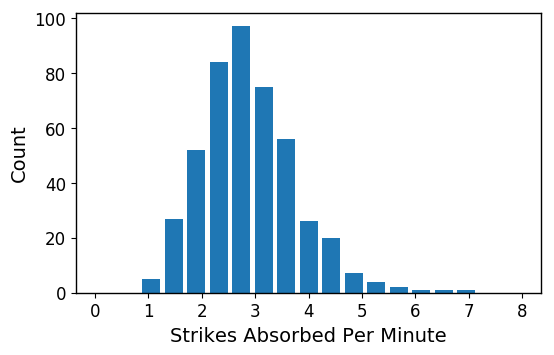

In [18]:
plt.hist(cs5.sapm, bins=np.linspace(0, 8, num=20), rwidth=0.8)
plt.xlabel('Strikes Absorbed Per Minute')
plt.ylabel('Count')

In [19]:
cs5.sapm.quantile(0.5)

2.8

### Who makes their opponent miss the most?

In [20]:
cs5.sort_values('str_def', ascending=False).head(15)

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
375,6,Dominick Cruz,3.53,0.31,2.15,0.74,3.17,0.50,0.83,0.1,11.33
43,18,Georges St-Pierre,3.77,0.53,1.38,0.72,4.20,0.74,0.83,1.1,13.27
113,13,Phil Davis,2.85,0.34,1.33,0.72,2.99,0.38,0.72,0.6,9.93
110,13,John Makdessi,5.39,0.51,3.95,0.71,0.00,0.00,0.87,0.0,11.43
386,6,Henry Cejudo,3.87,0.42,2.70,0.71,2.12,0.31,1.00,0.2,11.33
279,8,Myles Jury,2.29,0.35,1.49,0.71,2.61,0.52,0.00,0.4,8.37
221,9,Jose Aldo,3.28,0.43,2.09,0.71,0.83,0.72,0.92,0.2,9.18
25,20,Ryan Bader,2.82,0.43,1.39,0.71,3.37,0.44,0.80,0.4,10.36
181,10,Eddie Wineland,3.36,0.29,3.42,0.71,0.34,0.33,0.85,0.2,9.50
293,8,Vaughan Lee,3.47,0.47,2.07,0.70,0.81,0.33,0.72,1.0,9.57


### Who lands the most takedowns?

In [21]:
cs5.sort_values('td_avg', ascending=False).head(15)

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
298,8,Patrick Cummins,4.32,0.52,2.75,0.57,6.87,0.51,0.80,0.2,16.54
312,7,Colby Covington,2.51,0.51,1.43,0.60,6.79,0.54,0.00,0.4,12.78
361,7,Jake O'Brien,1.31,0.31,1.92,0.69,6.39,0.54,0.25,0.2,11.61
263,8,Ronda Rousey,4.17,0.52,4.14,0.44,6.26,0.68,0.50,4.8,21.51
264,8,Khabib Nurmagomedov,3.82,0.50,1.50,0.70,6.15,0.48,0.83,0.6,14.58
258,8,Wilson Reis,2.15,0.37,2.12,0.62,5.51,0.46,0.53,0.8,12.56
190,10,Ramsey Nijem,3.05,0.44,1.62,0.62,5.32,0.62,0.55,1.1,13.32
197,10,Karo Parisyan,2.49,0.41,2.19,0.58,5.27,0.59,0.59,1.0,13.12
400,6,Jimy Hettes,3.47,0.57,3.50,0.57,5.20,0.44,0.61,1.4,15.76
98,14,Cain Velasquez,6.38,0.57,2.29,0.57,5.15,0.45,0.85,0.4,16.66


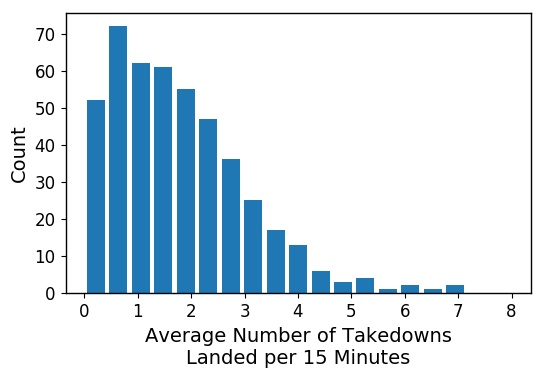

In [22]:
plt.hist(cs5.td_avg, bins=np.linspace(0, 8, num=20), rwidth=0.8)
plt.xlabel('Average Number of Takedowns\nLanded per 15 Minutes')
plt.ylabel('Count')

In [23]:
cs5.td_avg.quantile(0.5)

1.55

In [24]:
from scipy import stats
stats.percentileofscore(cs5.td_avg, 1.55)

50.108932461873636

In [25]:
stats.percentileofscore(cs5.td_avg, 5.0)

97.821350762527231

In [26]:
cs5.sort_values('td_acc', ascending=False).head(15)

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
242,9,Tim Sylvia,4.23,0.41,2.61,0.61,0.11,1.00,0.75,0.1,9.82
232,9,Drew McFedries,5.13,0.51,4.56,0.52,1.42,1.00,0.56,0.7,14.40
403,6,Hyun Gyu Lim,4.93,0.43,5.33,0.46,0.30,1.00,0.77,0.3,13.52
327,7,Jessica Eye,3.52,0.36,3.43,0.59,0.16,1.00,0.61,0.2,9.87
330,7,Forrest Petz,2.27,0.29,2.20,0.57,1.30,1.00,0.66,0.0,8.29
453,6,Edwin Figueroa,2.57,0.39,3.06,0.51,0.20,1.00,0.37,0.6,8.70
300,8,Marcus Brimage,3.97,0.35,3.64,0.56,0.56,1.00,0.80,0.0,10.88
287,8,Cyrille Diabate,4.06,0.71,1.78,0.60,1.17,0.83,0.53,0.2,9.88
70,16,Alex Caceres,3.72,0.49,2.49,0.63,0.68,0.81,0.56,0.9,10.28
383,6,Adriano Martins,1.85,0.37,2.09,0.66,0.97,0.80,0.81,0.2,7.75


In [27]:
cs5.sort_values('td_def', ascending=False).head(15)

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
138,12,Chad Mendes,2.70,0.49,2.16,0.68,4.16,0.54,1.00,0.3,12.03
336,7,Sara McMann,2.37,0.45,2.05,0.49,4.80,0.69,1.00,0.5,12.35
386,6,Henry Cejudo,3.87,0.42,2.70,0.71,2.12,0.31,1.00,0.2,11.33
234,9,Luiz Cane,4.79,0.41,5.00,0.60,0.56,0.28,1.00,0.3,12.94
199,10,Cezar Ferreira,1.85,0.39,1.86,0.56,2.62,0.69,1.00,0.3,9.27
180,10,Derek Brunson,3.13,0.46,2.62,0.50,3.13,0.32,1.00,0.7,11.86
292,8,Ilir Latifi,1.84,0.34,2.91,0.53,1.97,0.27,1.00,0.7,9.56
402,6,Cody Garbrandt,3.58,0.37,3.04,0.68,1.19,0.38,1.00,0.0,10.24
143,12,Renan Barao,3.64,0.34,3.50,0.60,1.46,0.43,0.97,0.6,11.54
54,17,Jon Jones,4.25,0.55,2.00,0.65,2.25,0.52,0.94,0.6,11.76


In [28]:
cs5.sort_values('sub_avg', ascending=False).head(15)

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total
263,8,Ronda Rousey,4.17,0.52,4.14,0.44,6.26,0.68,0.50,4.8,21.51
291,8,TJ Waldburger,2.02,0.51,2.39,0.40,3.03,0.46,0.40,4.8,14.01
130,12,Rousimar Palhares,1.75,0.51,2.04,0.59,3.93,0.45,0.00,4.1,13.37
184,10,Dustin Hazelett,2.24,0.40,3.51,0.46,0.55,0.50,0.25,4.1,12.01
256,8,Chas Skelly,1.84,0.38,3.29,0.46,1.88,0.37,0.41,2.9,11.53
51,17,Charles Oliveira,3.17,0.50,3.04,0.52,2.66,0.37,0.58,2.7,13.54
290,8,Louis Smolka,4.17,0.48,2.93,0.55,1.97,0.36,0.38,2.6,13.44
457,6,Renato Sobral,2.23,0.45,1.53,0.57,2.48,0.42,0.65,2.6,10.93
445,6,Dustin Pague,1.65,0.53,2.96,0.41,1.03,0.44,0.55,2.6,10.17
326,7,Cody McKenzie,1.74,0.34,2.50,0.67,2.50,0.25,0.14,2.5,10.64


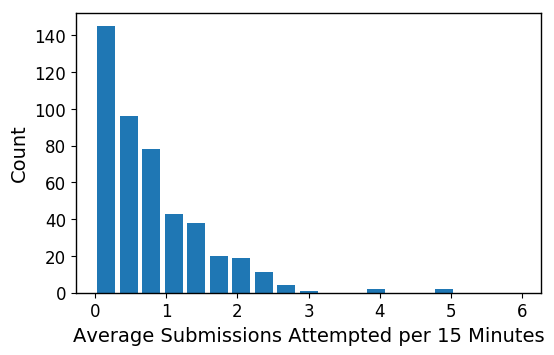

In [29]:
plt.hist(cs5.sub_avg, bins=np.linspace(0, 6, num=20), rwidth=0.8)
plt.xlabel('Average Submissions Attempted per 15 Minutes')
plt.ylabel('Count')

In [30]:
cs5.sub_avg.quantile(0.5)

0.6

# Part 2: Career stats versus weight class

In [31]:
mj = pd.read_csv('data/weight_class_majority.csv', header=0)
mj.head()

,Name,WeightClassMajority,Active
0,Germaine de Randamie,Women's Bantamweight,1.0
1,Anderson Silva,Middleweight,1.0
2,Jacare Souza,Middleweight,1.0
3,Glover Teixeira,Light Heavyweight,1.0
4,Dustin Poirier,Featherweight,1.0


In [32]:
cmb = cs5.merge(mj, on='Name', how='left')
cmb.head()

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total,WeightClassMajority,Active
0,27,Michael Bisping,4.44,0.38,2.63,0.66,1.10,0.43,0.64,0.3,10.58,Middleweight,1.0
1,26,Gleison Tibau,1.95,0.33,2.37,0.63,4.30,0.54,0.92,0.9,11.94,Lightweight,1.0
2,26,Jim Miller,2.75,0.39,2.64,0.62,1.70,0.42,0.48,2.1,11.10,Lightweight,1.0
3,25,Josh Koscheck,1.79,0.36,2.21,0.63,2.51,0.48,0.64,0.4,9.02,Welterweight,0.0
4,25,Diego Sanchez,2.75,0.36,2.95,0.58,1.48,0.21,0.50,1.0,9.83,Welterweight,1.0


In [33]:
cmb.isnull().sum()

total_fights           0
Name                   0
slpm                   0
str_acc                0
sapm                   0
str_def                0
td_avg                 0
td_acc                 0
td_def                 0
sub_avg                0
total                  0
WeightClassMajority    0
Active                 4
dtype: int64

In [34]:
cmb.groupby('WeightClassMajority').count()

,total_fights,Name,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total,Active
WeightClassMajority,,,,,,,,,,,,
Bantamweight,33,33,33,33,33,33,33,33,33,33,33,33
Featherweight,44,44,44,44,44,44,44,44,44,44,44,42
Flyweight,20,20,20,20,20,20,20,20,20,20,20,20
Heavyweight,37,37,37,37,37,37,37,37,37,37,37,37
Light Heavyweight,50,50,50,50,50,50,50,50,50,50,50,48
Lightweight,93,93,93,93,93,93,93,93,93,93,93,93
Middleweight,73,73,73,73,73,73,73,73,73,73,73,73
Welterweight,94,94,94,94,94,94,94,94,94,94,94,94
Women's Bantamweight,12,12,12,12,12,12,12,12,12,12,12,12


In [35]:
by_weight = cmb.groupby('WeightClassMajority').median()
by_weight = by_weight.drop("Women's Strawweight")
by_weight

,total_fights,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total,Active
WeightClassMajority,,,,,,,,,,,
Bantamweight,8,3.360,0.410,2.940,0.63,1.440,0.400,0.660,0.60,10.400,1.0
Featherweight,8,2.995,0.430,2.965,0.57,1.185,0.370,0.610,0.80,10.720,1.0
Flyweight,8,3.345,0.420,2.405,0.62,2.040,0.365,0.595,0.60,10.885,1.0
Heavyweight,11,3.080,0.470,2.940,0.54,1.250,0.400,0.660,0.30,9.860,0.0
Light Heavyweight,10,3.230,0.455,2.840,0.57,1.340,0.415,0.635,0.55,10.505,0.0
Lightweight,9,3.050,0.400,2.690,0.61,1.760,0.380,0.630,0.70,10.440,1.0
Middleweight,10,2.800,0.440,2.700,0.56,1.580,0.400,0.600,0.70,10.010,0.0
Welterweight,9,2.710,0.430,2.770,0.57,1.600,0.460,0.620,0.60,10.410,0.5
Women's Bantamweight,7,3.985,0.470,3.175,0.54,1.735,0.405,0.675,0.65,12.045,1.0


In [36]:
wc = ["Women's Strawweight", "Women's Bantamweight", 'Flyweight', 'Bantamweight', 'Featherweight',
      'Lightweight', 'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']
wlabels = ['W-S', 'W-B', 'FY', 'BW', 'FTW', 'LW', 'WW', 'MW', 'LH', 'HW']

In [37]:
wlabels

['W-S', 'W-B', 'FY', 'BW', 'FTW', 'LW', 'WW', 'MW', 'LH', 'HW']

In [38]:
wc.reverse()
wlabels.reverse()
by_weight = by_weight.reindex(wc)
by_weight

,total_fights,slpm,str_acc,sapm,str_def,td_avg,td_acc,td_def,sub_avg,total,Active
WeightClassMajority,,,,,,,,,,,
Heavyweight,11.0,3.080,0.470,2.940,0.54,1.250,0.400,0.660,0.30,9.860,0.0
Light Heavyweight,10.0,3.230,0.455,2.840,0.57,1.340,0.415,0.635,0.55,10.505,0.0
Middleweight,10.0,2.800,0.440,2.700,0.56,1.580,0.400,0.600,0.70,10.010,0.0
Welterweight,9.0,2.710,0.430,2.770,0.57,1.600,0.460,0.620,0.60,10.410,0.5
Lightweight,9.0,3.050,0.400,2.690,0.61,1.760,0.380,0.630,0.70,10.440,1.0
Featherweight,8.0,2.995,0.430,2.965,0.57,1.185,0.370,0.610,0.80,10.720,1.0
Bantamweight,8.0,3.360,0.410,2.940,0.63,1.440,0.400,0.660,0.60,10.400,1.0
Flyweight,8.0,3.345,0.420,2.405,0.62,2.040,0.365,0.595,0.60,10.885,1.0
Women's Bantamweight,7.0,3.985,0.470,3.175,0.54,1.735,0.405,0.675,0.65,12.045,1.0


In [39]:
wc

['Heavyweight',
 'Light Heavyweight',
 'Middleweight',
 'Welterweight',
 'Lightweight',
 'Featherweight',
 'Bantamweight',
 'Flyweight',
 "Women's Bantamweight",
 "Women's Strawweight"]

In [40]:
wlabels

['HW', 'LH', 'MW', 'WW', 'LW', 'FTW', 'BW', 'FY', 'W-B', 'W-S']

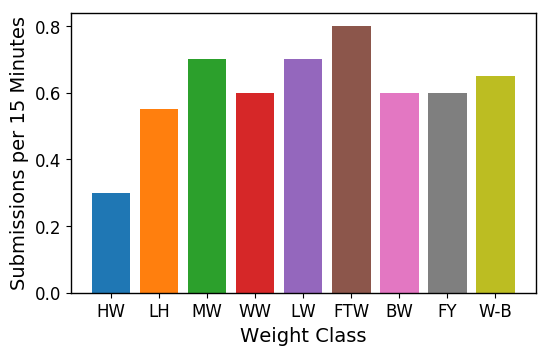

In [41]:
for i in range(9):
     #plt.bar(range(by_weight.shape[0]), by_weight.slpm)
     plt.bar(i, by_weight.sub_avg.iloc[i])
plt.axes().set_xticks(range(by_weight.shape[0] - 1))
plt.axes().set_xticklabels(wlabels[:-1])
plt.xlabel('Weight Class')
plt.ylabel('Submissions per 15 Minutes')

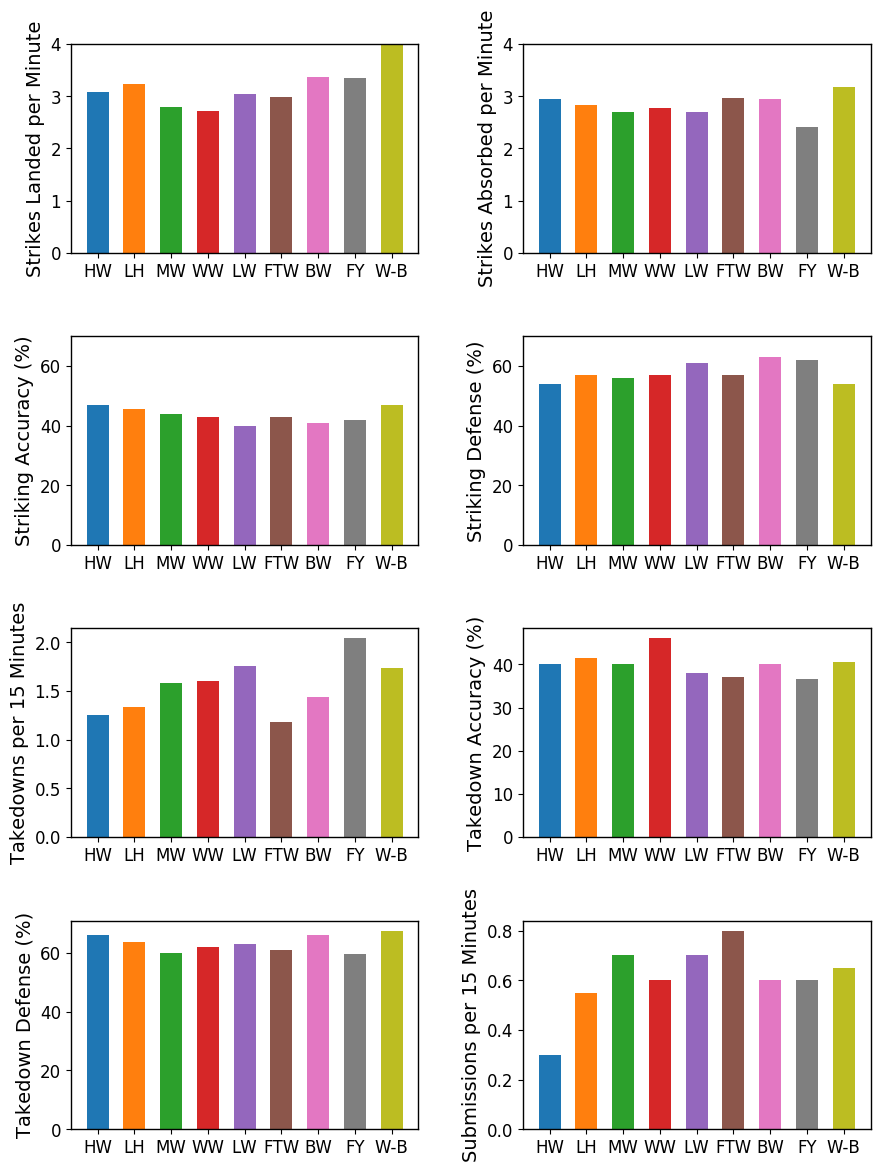

In [42]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(9, 12))

for i in range(9):
     ax1.bar(i, by_weight.slpm.iloc[i], width=0.6)
ax1.set_xticks(range(by_weight.shape[0] - 1))
ax1.set_xticklabels(wlabels[:-1])
ax1.set_ylabel('Strikes Landed per Minute')
ax1.set_ylim(0, 4)

for i in range(9):
     ax2.bar(i, by_weight.sapm.iloc[i], width=0.6)
ax2.set_xticks(range(by_weight.shape[0] - 1))
ax2.set_xticklabels(wlabels[:-1])
ax2.set_ylabel('Strikes Absorbed per Minute')
ax2.set_ylim(0, 4)

for i in range(9):
     ax3.bar(i, 100*by_weight.str_acc.iloc[i], width=0.6)
ax3.set_xticks(range(by_weight.shape[0] - 1))
ax3.set_xticklabels(wlabels[:-1])
ax3.set_ylabel('Striking Accuracy (%)')
ax3.set_ylim(0, 70)

for i in range(9):
     ax4.bar(i, 100*by_weight.str_def.iloc[i], width=0.6)
ax4.set_xticks(range(by_weight.shape[0] - 1))
ax4.set_xticklabels(wlabels[:-1])
ax4.set_ylabel('Striking Defense (%)')
ax4.set_ylim(0, 70)

for i in range(9):
     ax5.bar(i, by_weight.td_avg.iloc[i], width=0.6)
ax5.set_xticks(range(by_weight.shape[0] - 1))
ax5.set_xticklabels(wlabels[:-1])
ax5.set_ylabel('Takedowns per 15 Minutes')

for i in range(9):
     ax6.bar(i, 100*by_weight.td_acc.iloc[i], width=0.6)
ax6.set_xticks(range(by_weight.shape[0] - 1))
ax6.set_xticklabels(wlabels[:-1])
ax6.set_ylabel('Takedown Accuracy (%)')

for i in range(9):
     ax7.bar(i, 100*by_weight.td_def.iloc[i], width=0.6)
ax7.set_xticks(range(by_weight.shape[0] - 1))
ax7.set_xticklabels(wlabels[:-1])
ax7.set_ylabel('Takedown Defense (%)')

for i in range(9):
     ax8.bar(i, by_weight.sub_avg.iloc[i], width=0.6)
ax8.set_xticks(range(by_weight.shape[0] - 1))
ax8.set_xticklabels(wlabels[:-1])
ax8.set_ylabel('Submissions per 15 Minutes')

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)

plt.savefig('report/offense_defense/many_bars.pdf', bbox_inches='tight')

In [43]:
age_class = []
for w in wc:
     tmp = cmb[(cmb.WeightClassMajority == w) & (cmb.Active == 1)]
     w_class = w.lower().replace('women\'s', 'w').replace(' ', '_')
     exec('age_' + w_class + '=tmp.td_avg.values')
     exec('age_class.append(age_' + w_class + ')')

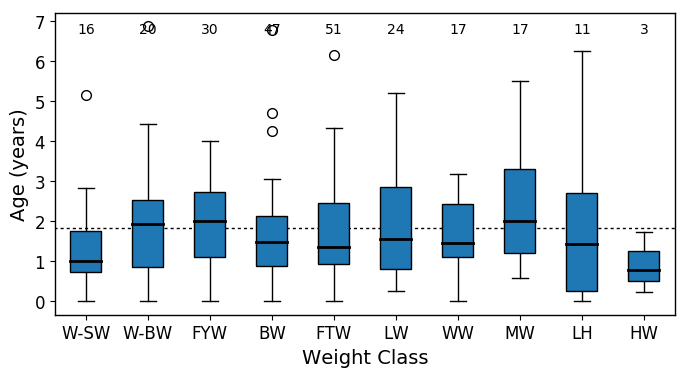

In [44]:
mean_age = cmb[(cmb.Active == 1)].td_avg.mean()
fig, ax = plt.subplots(figsize=(8, 4))
wlabels = ['W-SW', 'W-BW', 'FYW', 'BW', 'FTW', 'LW', 'WW', 'MW', 'LH', 'HW']
plt.boxplot(age_class, labels=wlabels, patch_artist=True)
plt.plot([-1, 13], [mean_age, mean_age], 'k:', zorder=0)
for i, ages in enumerate(age_class):
     plt.text(i + 1, 6.7, ages.size, ha='center', fontsize=10)
#plt.ylim(15, 45)
plt.xlabel('Weight Class')
plt.ylabel('Age (years)')
#plt.savefig('report/finish/anova_age_by_weightclass.pdf', bbox_inches='tight')